<a href="https://colab.research.google.com/github/paulcodrea/dissertation/blob/main/stock_price_prediction_SVM_RF_hourly_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install treeinterpreter
from sklearn.model_selection import train_test_split
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import svm
from sklearn.svm import SVR 

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
import datetime
# import GetOldTweets3 as got
# import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import sys
import re
import string
import json
import os

In [3]:
# Predicting stock prices using Random Forest model
def RandomForestModel(df):
  # df = pd.read_csv('sentimentAnalysis_' + stockname +'.csv')
  train, test = train_test_split(df, shuffle=False, test_size=0.2)
  print(train.size)
  print(test.size)

  sentiment_score_list_train = []
  for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'negative'], df.loc[date, 'neutral'],  df.loc[date, 'positive']])
    sentiment_score_list_train.append(sentiment_score)
  numpy_df_train = np.asarray(sentiment_score_list_train)

  sentiment_score_list_test = []
  for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'negative'], df.loc[date, 'neutral'],  df.loc[date, 'positive']])
    sentiment_score_list_test.append(sentiment_score)
  numpy_df_test = np.asarray(sentiment_score_list_test)

  y_train = pd.DataFrame(train['Price'])
  y_test = pd.DataFrame(test['Price'])

  rf = RandomForestRegressor()
  rf.fit(numpy_df_train, y_train)
  prediction, bias, contributions = ti.predict(rf, numpy_df_test)

  print("\n\n")
  plt.figure()
  plt.plot(test['Price'].iloc[:].values)
  plt.plot(prediction.flatten())
  plt.title('Random Forest predicted prices')
  plt.ylabel('Stock Prices')
  plt.xlabel('Days')
  plt.legend(['actual', 'predicted'])
  plt.show()

  print("\n\n")
  print("RMSE value for Random Forest Model : ")
  rmse = sqrt(mean_squared_error(y_test, prediction.flatten()))
  print(rmse)
  print("\n\n")

In [4]:
# Predicting stock prices using Support Vector Regression model
def SVRModel(stockname):
  # df = pd.read_csv('sentimentAnalysis_' + stockname +'.csv')
  train, test = train_test_split(df, shuffle=False, test_size=0.2)
  print(train.size)
  print(test.size)

  sentiment_score_list_train = []
  for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'negative'], df.loc[date, 'neutral'],  df.loc[date, 'positive']])
    sentiment_score_list_train.append(sentiment_score)
  numpy_df_train = np.asarray(sentiment_score_list_train)

  sentiment_score_list_test = []
  for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'negative'], df.loc[date, 'neutral'],  df.loc[date, 'positive']])
    sentiment_score_list_test.append(sentiment_score)
  numpy_df_test = np.asarray(sentiment_score_list_test)

  y_train = pd.DataFrame(train['Price'])
  y_test = pd.DataFrame(test['Price'])

  svr_rbf = SVR(kernel='rbf', C=1e6, gamma=0.1)
  svr_rbf.fit(numpy_df_train, y_train.values.flatten())
  output_test_svm = svr_rbf.predict(numpy_df_test)

  plt.figure()
  plt.plot(test['Price'].iloc[:].values)
  plt.plot(output_test_svm)
  plt.title('SVM predicted prices')
  plt.ylabel('Stock Prices')
  plt.xlabel('Days')
  plt.legend(['actual', 'predicted'])
  plt.show()

  print("\n\n")
  print("RMSE value for Support Vector Regression Model : ")
  rmse = sqrt(mean_squared_error(y_test, output_test_svm))
  print(rmse)
  print("\n\n")

In [5]:
df = pd.read_csv("/content/drive/MyDrive/COMP30030_Dissertation_paul.codrea/Market-prediction/hour_df.csv")#('/content/hour_df.csv')

In [6]:
print(df.head())

               date  positive  negative   neutral       score     close
0  2022-02-27 11:00  0.136658  0.020665  0.842666  534.449361  39506.94
1  2022-02-27 12:00  0.140839  0.022763  0.836392  695.736467  39772.65
2  2022-02-27 13:00  0.154944  0.027658  0.817392  456.427667  39087.32
3  2022-02-27 14:00  0.137984  0.033730  0.828276  547.796955  38805.72
4  2022-02-27 15:00  0.137928  0.049283  0.812779  525.495285  39375.33


In [7]:
# df.set_index('Date',inplace=True)
# df.drop(columns=['coin_type'], inplace=True)
df.rename(columns={'close':'Price'}, inplace=True)
df

,date,positive,negative,neutral,score,Price
0,2022-02-27 11:00,0.136658,0.020665,0.842666,534.449361,39506.94
1,2022-02-27 12:00,0.140839,0.022763,0.836392,695.736467,39772.65
2,2022-02-27 13:00,0.154944,0.027658,0.817392,456.427667,39087.32
3,2022-02-27 14:00,0.137984,0.033730,0.828276,547.796955,38805.72
4,2022-02-27 15:00,0.137928,0.049283,0.812779,525.495285,39375.33
...,...,...,...,...,...,...
99,2022-03-03 14:00,0.134550,0.026545,0.838902,601.876917,43505.32
100,2022-03-03 15:00,0.145464,0.026063,0.828469,1789.585619,42575.67
101,2022-03-03 16:00,0.144684,0.032216,0.823096,2526.700818,42436.28
102,2022-03-03 17:00,0.158011,0.034851,0.807137,401.510199,42409.91


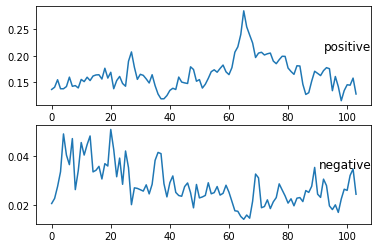

In [8]:
values = df.values
# specify columns to plot
groups = [1, 2]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

498
126


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


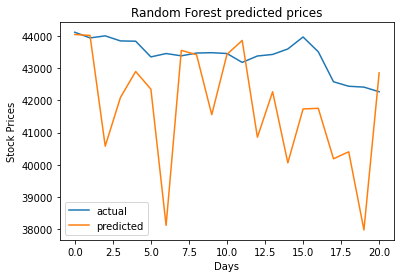




RMSE value for Random Forest Model : 
2259.9440294533047





In [9]:
RandomForestModel(df)

498
126


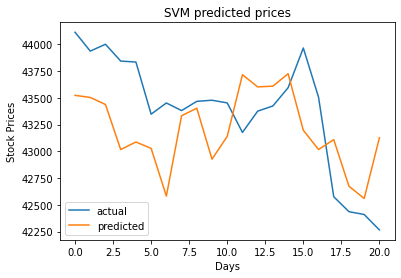




RMSE value for Support Vector Regression Model : 
520.0367629558989





In [10]:
SVRModel(df)